In [3]:
import os
import re
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [4]:
IMAGE_SHAPE = (600, 800)
TRAIN_DIR = 'data/images/training/image_2/'
GT_DIR = 'data/images/training/gt_image_2/'
CHOSEN_IMG = 'um_000000.png'

image = cv2.imread(os.path.join(TRAIN_DIR, CHOSEN_IMG))
label = cv2.imread(os.path.join(GT_DIR, CHOSEN_IMG))

In [5]:
def rename_files(directory, testing = True):
    for filename in os.listdir(GT_DIR):
        if filename.startswith('uu_road'):
            if testing == True:
                print(filename)
                print('uu'+filename[7:])
            elif testing == False:
                os.rename(GT_DIR+filename,GT_DIR+'uu'+filename[7:])

In [6]:
def gen_batch_function(train_dir, gt_dir, image_shape):
    """
    Generate function to create batches of training data
    :param data_folder: Path to folder that contains all the datasets
    :param image_shape: Tuple - Shape of image
    :return:
    """
    def get_batches_fn(batch_size):
        """
        Create batches of training data
        :param batch_size: Batch Size
        :return: Batches of training data
        """
        image_paths = glob(os.path.join(train_dir, '*.png'))
        label_paths = glob(os.path.join(gt_dir, '*.png'))
        background_color = np.array([255, 0, 0])

        random.shuffle(image_paths)
        
        for batch_i in range(0, len(image_paths), batch_size):
            images = []
            gt_images = []
            for image_file in image_paths[batch_i:batch_i+batch_size]:
                gt_image_file = gt_dir+os.path.basename(image_file)
                
                # Load image, convert it from bgr to rgb, resize it to chosen size
                image = cv2.resize(cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB), image_shape[::-1])
                gt_image = cv2.resize(cv2.cvtColor(cv2.imread(gt_image_file), cv2.COLOR_BGR2RGB), image_shape[::-1])

                gt_bg = np.all(gt_image == background_color, axis=2)
                gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
                gt_image = np.dstack((gt_bg, np.invert(gt_bg)))
                
                images.append(image)
                gt_images.append(gt_image)

            yield np.array(images), np.array(gt_images)
    return get_batches_fn

In [7]:
get_batches_fn = gen_batch_function(TRAIN_DIR, GT_DIR, (160, 576))

In [8]:
test_img, test_lbl = next(get_batches_fn(1))
test_img = test_img[0]
test_lbl = test_lbl[0]

Text(0.5,1,'Road Label')

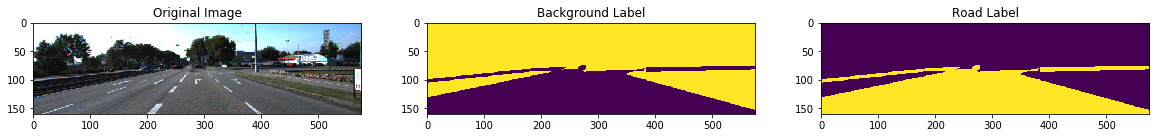

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,15))
ax1.imshow(test_img)
ax1.set_title('Original Image')
ax2.imshow(test_lbl[:,:,0])
ax2.set_title('Background Label')
ax3.imshow(test_lbl[:,:,1])
ax3.set_title('Road Label')

In [20]:
def images_to_video(img_dir):
    imgs = []
    for i in sorted(glob(os.path.join('data/saved_runs/img_to_vid/', '*.png'))):
        imgs.append(cv2.imread(i))
    
    height, width, channel = imgs[0].shape
    
    video = cv2.VideoWriter('video.avi', cv2.VideoWriter_fourcc(*"MJPG"),5,(width,height))
    print(len(imgs))
    for j in imgs:
        video.write(j)
    print('Done')
    
    cv2.destroyAllWindows()
    video.release()

In [21]:
images_to_video('data/saved_runs/img_to_vid/')

290
Done


In [ ]:
img1 = cv2.imre